# **IMPORTING LIBRARIES**

In [ ]:
#Array
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
color=plt.rcParams["axes.prop_cycle"].by_key()['color']

#Dataframe
import pandas as pd

# Data preprocessing
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,cross_val_predict

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report


# **LOADING THE DATASET**

In [ ]:
df= pd.read_csv('/content/Hotel Reservation .csv')

# **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
df.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.shape

(36275, 19)

# **DATA TYPE**

In [ ]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

# **FINDING DUPLICATE VALUES**

In [ ]:
data= pd.DataFrame(df.loc[df.duplicated()].count())
data.columns = ['Total Duplicate']
data

,Total Duplicate
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


# **FINDING NULL VALUES**

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# **STATISTICAL DATA**

In [ ]:
df.groupby('room_type_reserved')['no_of_adults'].value_counts()

room_type_reserved  no_of_adults
Room_Type 1         2               20710
                    1                6936
                    3                 481
                    0                   3
Room_Type 2         2                 532
                    0                 133
                    1                  26
                    3                   1
Room_Type 3         2                   4
                    1                   3
Room_Type 4         2                3746
                    3                1737
                    1                 573
                    4                   1
Room_Type 5         2                 135
                    1                 100
                    3                  29
                    4                   1
Room_Type 6         2                 882
                    1                  42
                    3                  39
                    0                   2
                    4                   1
R

In [ ]:
df.groupby('type_of_meal_plan')['no_of_adults'].value_counts()

type_of_meal_plan  no_of_adults
Meal Plan 1        2               19050
                   1                6469
                   3                2163
                   0                 137
                   4                  16
Meal Plan 2        2                2645
                   1                 535
                   3                 123
                   0                   2
Meal Plan 3        2                   5
Not Selected       2                4408
                   1                 691
                   3                  31
Name: no_of_adults, dtype: int64

In [ ]:
df.groupby('type_of_meal_plan')['no_of_children'].value_counts()

type_of_meal_plan  no_of_children
Meal Plan 1        0                 25420
                   1                  1422
                   2                   974
                   3                    16
                   9                     2
                   10                    1
Meal Plan 2        0                  3134
                   1                   106
                   2                    62
                   3                     3
Meal Plan 3        0                     5
Not Selected       0                  5018
                   1                    90
                   2                    22
Name: no_of_children, dtype: int64

In [ ]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

# **VALUE COUNTS**

In [ ]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
print('ROOM TYPES AVAILABLE :', df['room_type_reserved'].unique().tolist())

ROOM TYPES AVAILABLE : ['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5', 'Room_Type 7', 'Room_Type 3']


# **CHECKING THE TOTAL COUNT OF CATEGORICAL VARIABLE IN THE DATASET.**

In [ ]:
print(df.type_of_meal_plan.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64


# **MEAN OF PRICE**

In [ ]:
avg_price = pd.DataFrame(df.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values(ascending=False))
avg_price.columns = ['average_price']
avg_price

,average_price
room_type_reserved,
Room_Type 6,182.212836
Room_Type 7,155.198291
Room_Type 4,125.287317
Room_Type 5,123.733623
Room_Type 1,95.918532
Room_Type 2,87.848555
Room_Type 3,73.678571


# **DATA VISUALIZATION**

Text(0, 0.5, 'Counting values')

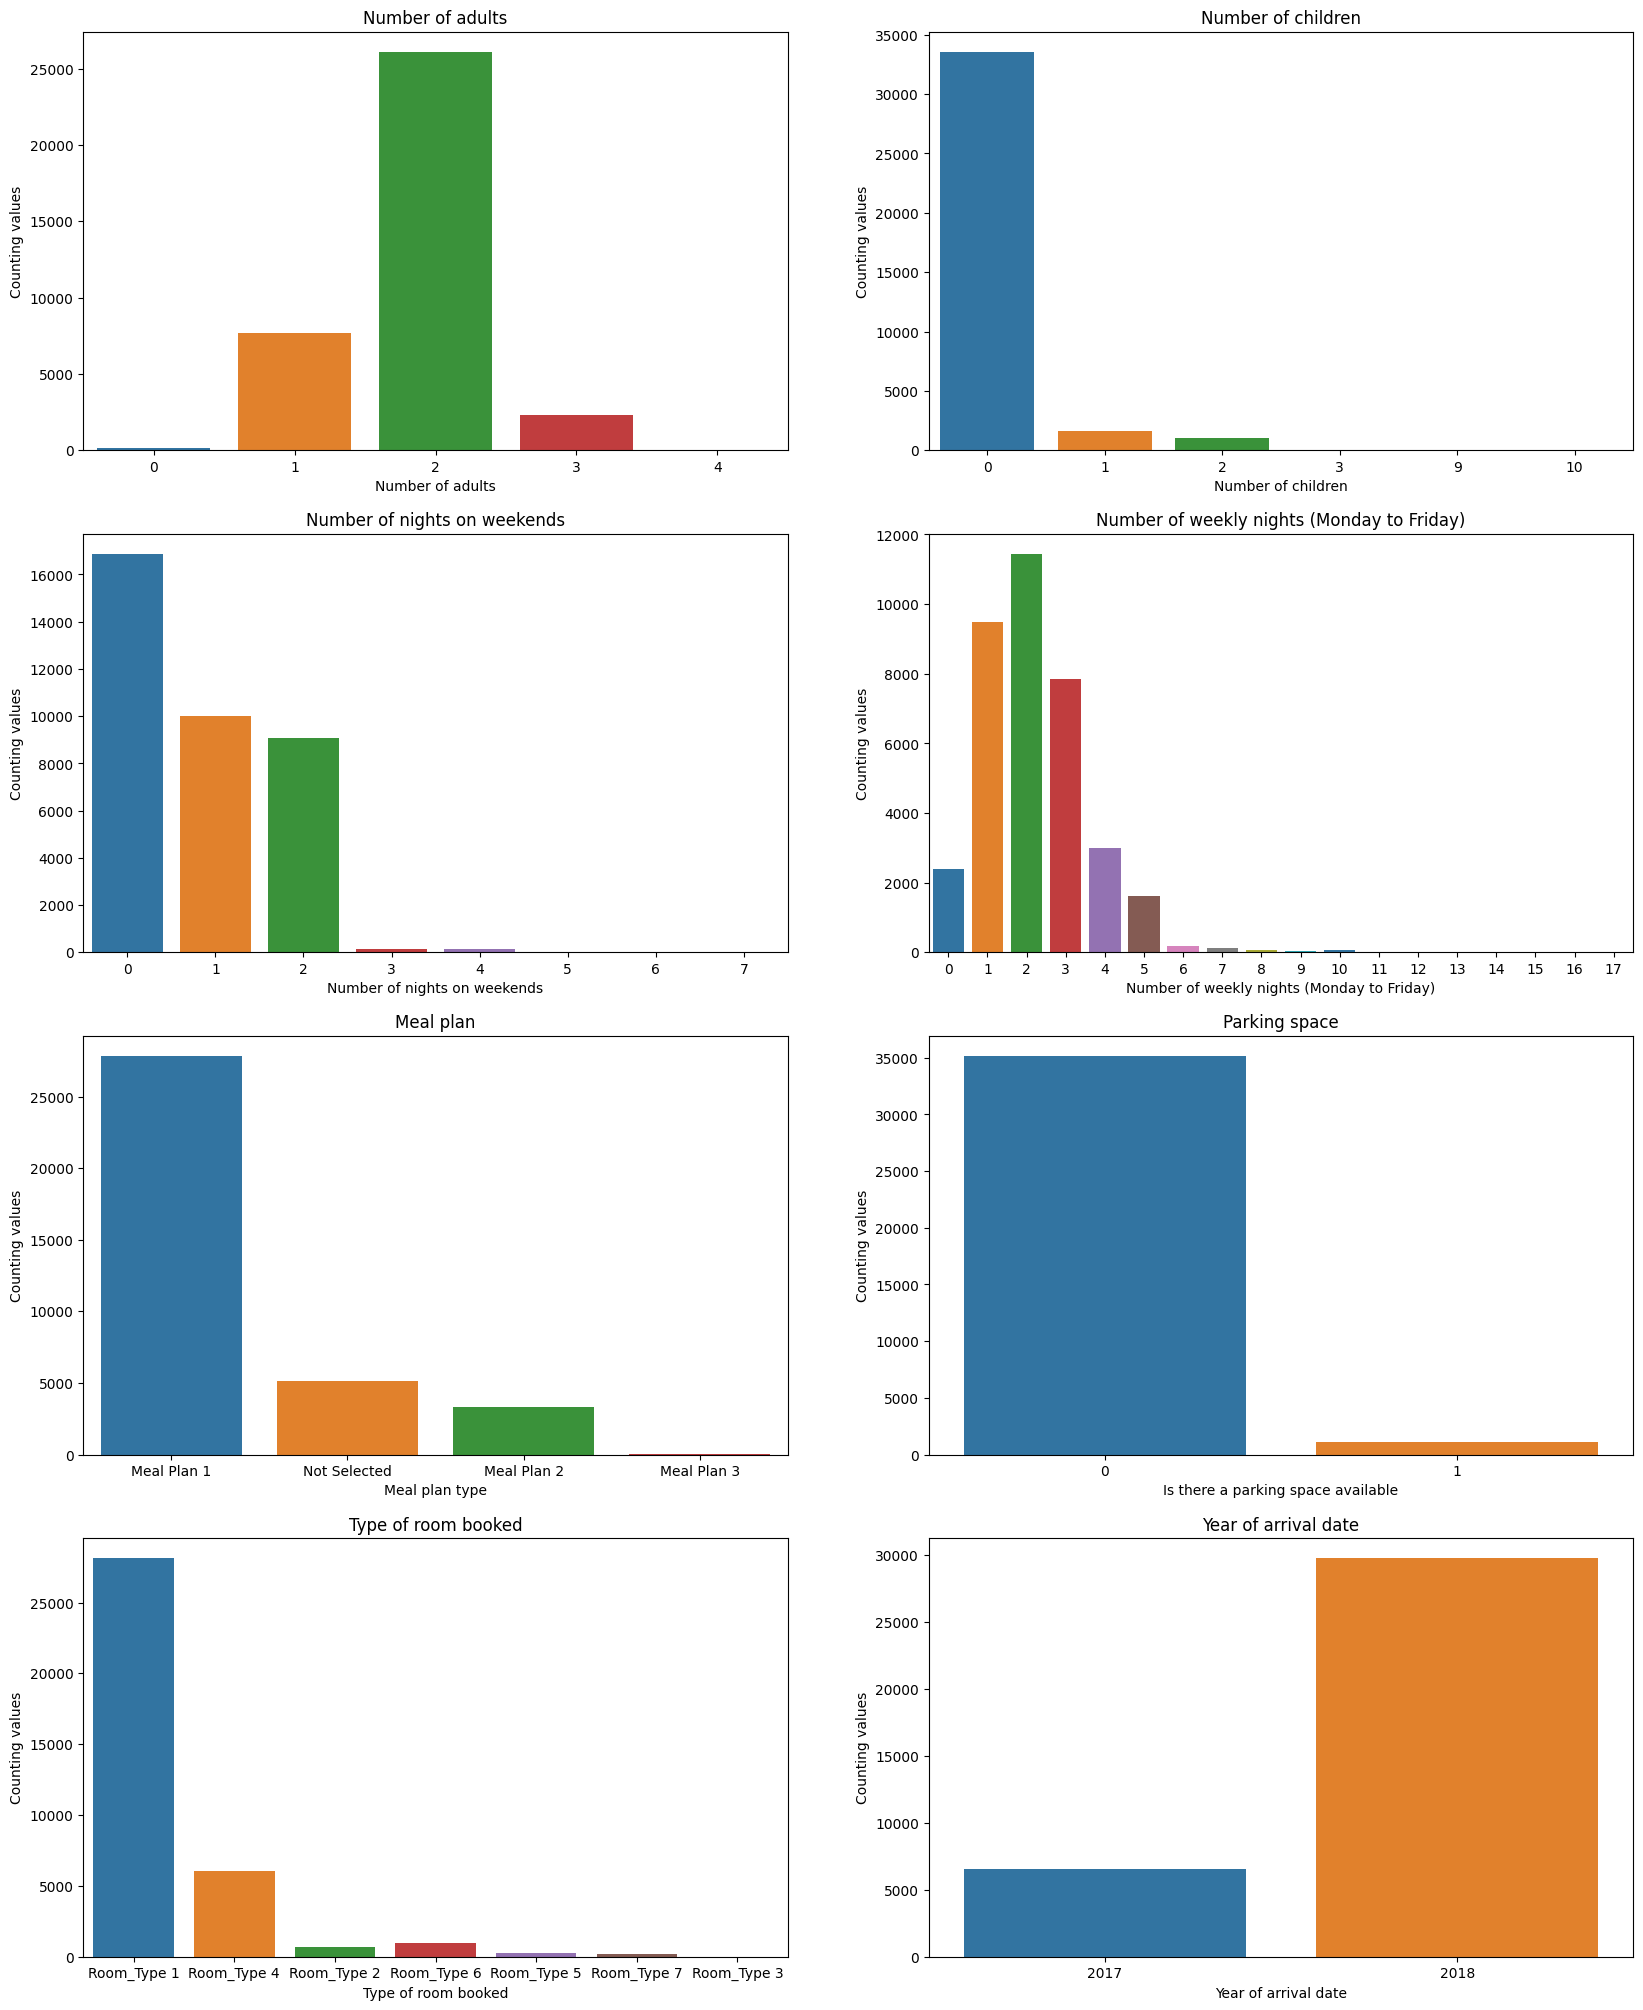

In [ ]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Number of adults')
sns.countplot(x = 'no_of_adults', palette = 'tab10', data = df)
plt.xlabel('Number of adults')
plt.ylabel('Counting values')
#Among those who visit, they are most likely to be Male & Female couples without children.

plt.subplot(4,2,2)
plt.gca().set_title('Number of children')
sns.countplot(x = 'no_of_children', palette = 'tab10', data = df)
plt.xlabel('Number of children')
plt.ylabel('Counting values')
#Among those who visit, they are most likely to be Male & Female couples with children.

plt.subplot(4,2,3)
plt.gca().set_title('Number of nights on weekends')
sns.countplot(x = 'no_of_weekend_nights', palette = 'tab10', data = df)
plt.xlabel('Number of nights on weekends')
plt.ylabel('Counting values')
#Among the number of weekends , most people take a hotel for one week plus one couple of weekends.

plt.subplot(4,2,4)
plt.gca().set_title('Number of weekly nights (Monday to Friday)')
sns.countplot(x = 'no_of_week_nights', palette = 'tab10', data = df)
plt.xlabel('Number of weekly nights (Monday to Friday)')
plt.ylabel('Counting values')
#Among the number of weekly nights, most people take a hotel for one week plus one couple of weekends.

plt.subplot(4,2,5)
plt.gca().set_title('Meal plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'tab10', data = df)
plt.xlabel('Meal plan type')
plt.ylabel('Counting values')
#Among meal plans they choose 1 or no meal plan, even less often 2 and not at all 3.

plt.subplot(4,2,6)
plt.gca().set_title('Parking space')
sns.countplot(x = 'required_car_parking_space', palette = 'tab10', data = df)
plt.xlabel('Is there a parking space available')
plt.ylabel('Counting values')
#No one practically takes a parking space

plt.subplot(4,2,7)
plt.gca().set_title('Type of room booked')
sns.countplot(x = 'room_type_reserved', palette = 'tab10', data = df)
plt.xlabel('Type of room booked')
plt.ylabel('Counting values')
#Room type 1 is taken the most, much more than all other room types
#we can say that the average price of room type 1 -- 103.423539 euros or 103.42 euros * 80 rubles/euro = 8273.6 rubles.

plt.subplot(4,2,8)
plt.gca().set_title('Year of arrival date')
sns.countplot(x = 'arrival_year', palette = 'tab10', data = df)
plt.xlabel('Year of arrival date')
plt.ylabel('Counting values')
#We have the most values for 2018

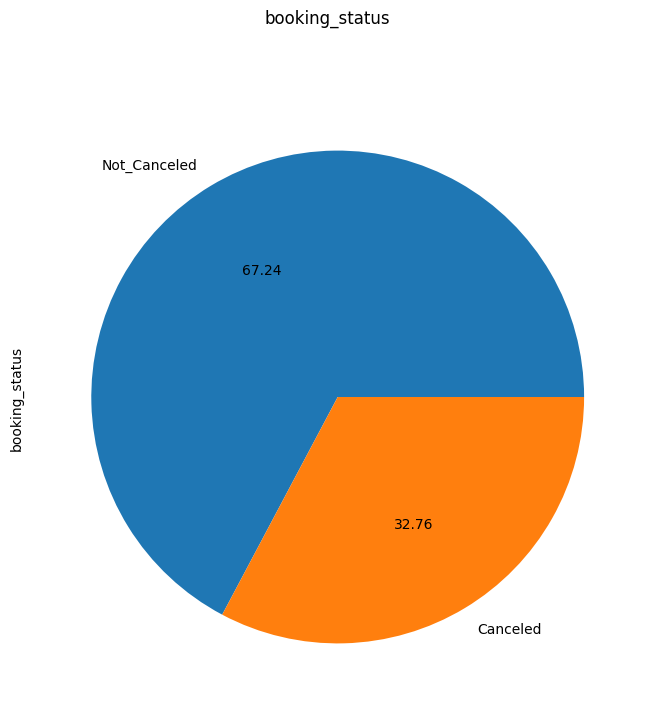

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [ ]:
df['booking_status'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(8,8), title='booking_status')
plt.show()
df['booking_status'].value_counts()

<ipython-input-20-98c0378f4161>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=df, palette="Blues", ci=None, width=0.7)


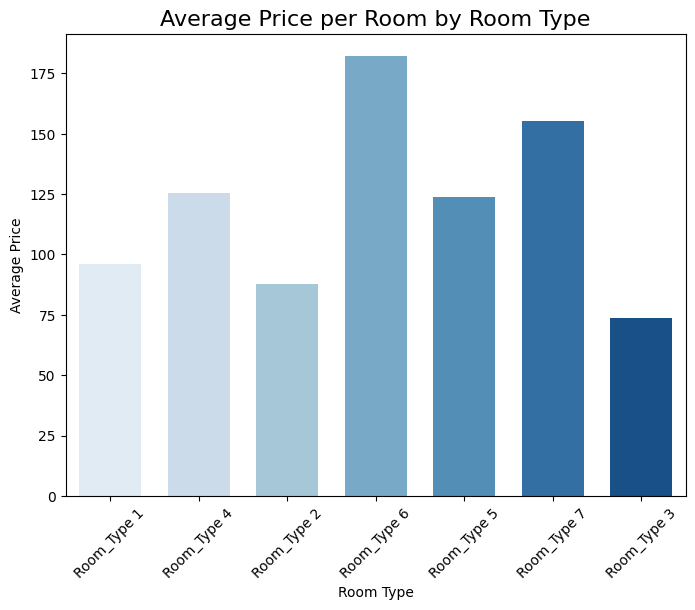

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=df, palette="Blues", ci=None, width=0.7)
plt.title('Average Price per Room by Room Type', fontsize=16)
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# **HEATMAP AND CORRELATION**

In [ ]:
df_corr = df.corr()
df_corr

<ipython-input-21-0c96883f2151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


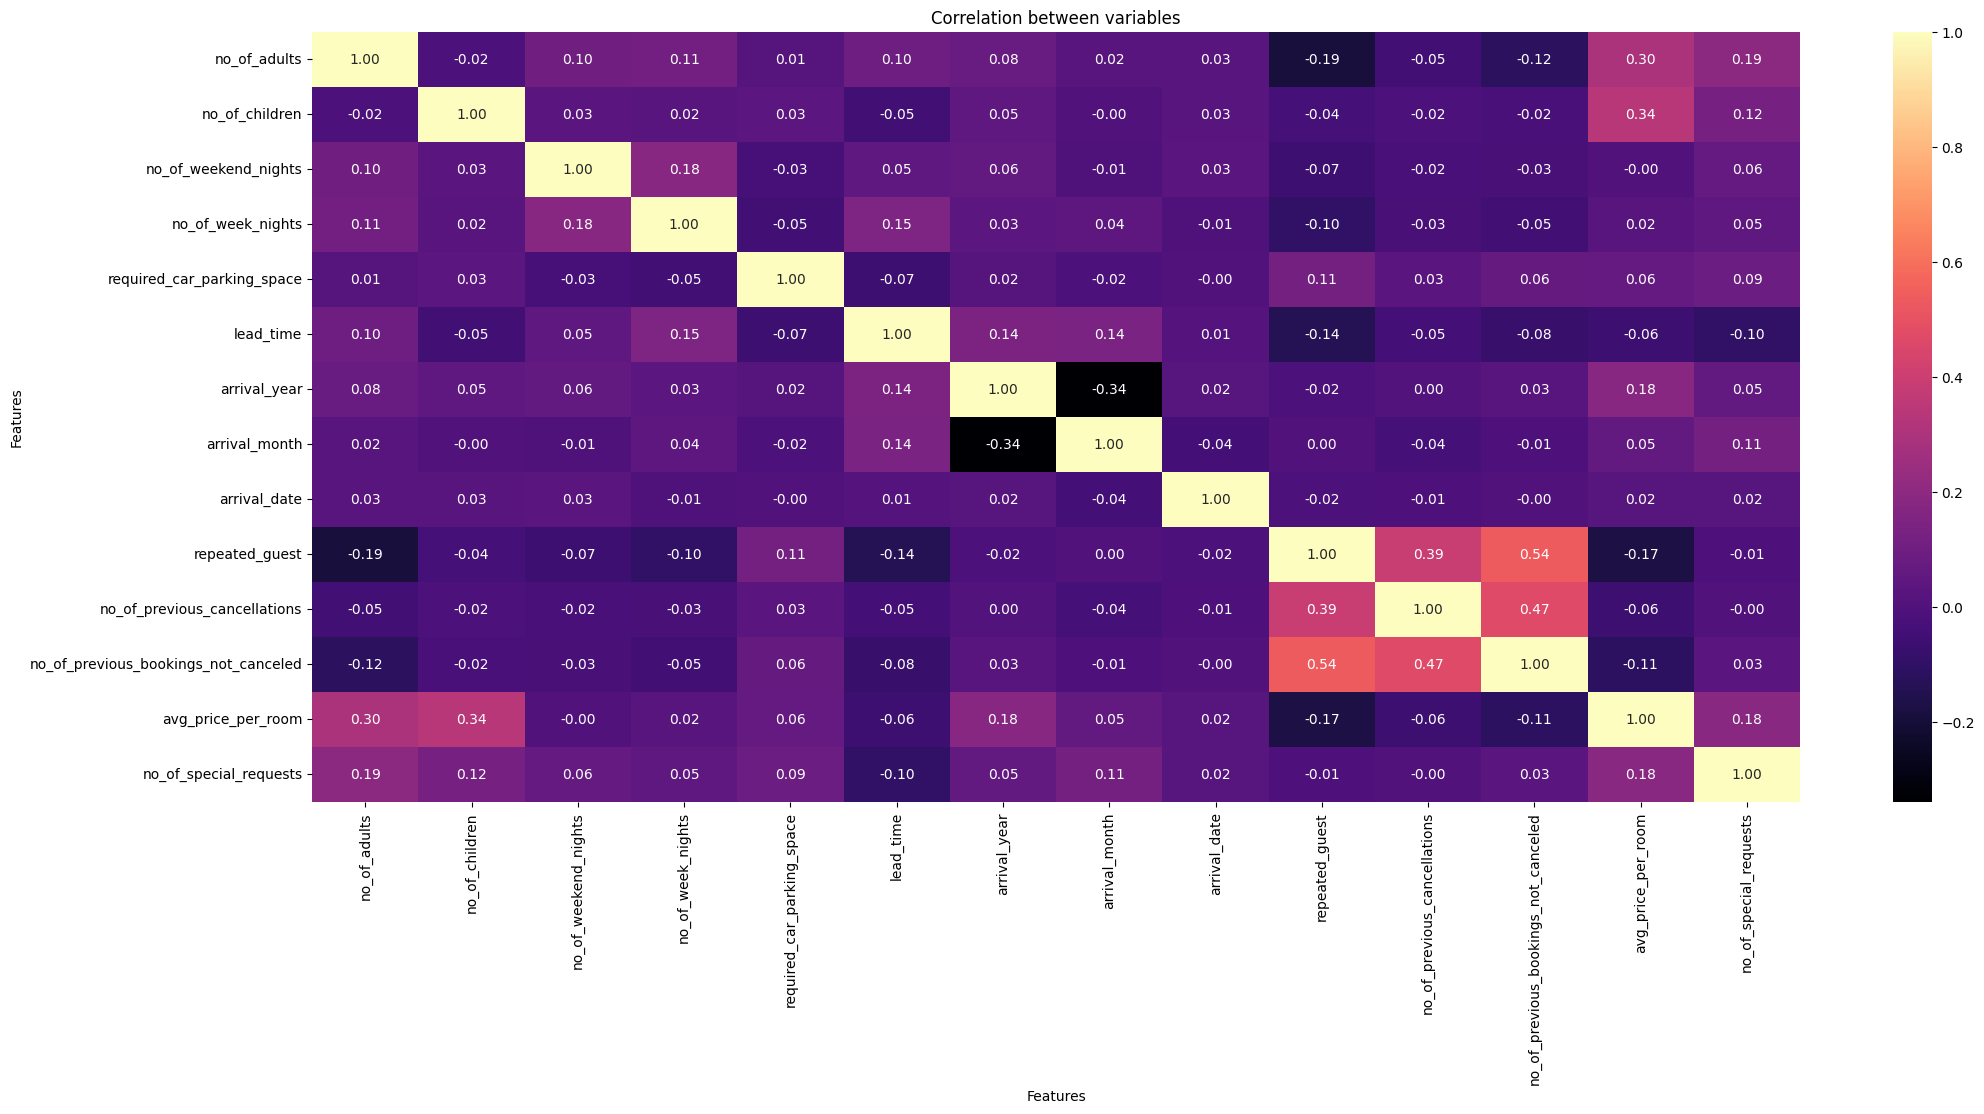

In [ ]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()
#There is a relationship between "number of days between booking date and hotel arrival date" and "whether the booking was canceled or not".
#lead_time / booking_status

Text(-3.680555555555541, 0.5, 'Number of bookings')

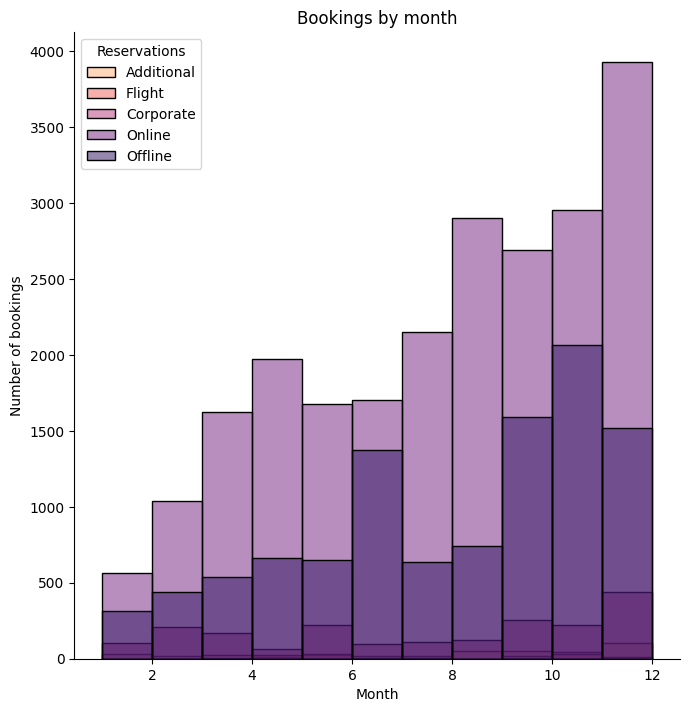

In [ ]:
sns.displot(df, x='arrival_month', binwidth=1, height=7, palette='magma', hue='market_segment_type', legend = False)
plt.gca().set_title('Bookings by month')
plt.legend(title= 'Reservations',
           labels=['Additional','Flight','Corporate','Online','Offline'])
plt.xlabel('Month')
plt.ylabel('Number of bookings')

#The number of bookings increases with the arrival of winter, it turns out that from August to December are the most 'Booked' months.
#Which is logical, since summer is leaving by August - you need to plan/book your next vacation.

Text(0, 0.5, 'Days between booking and arrival')

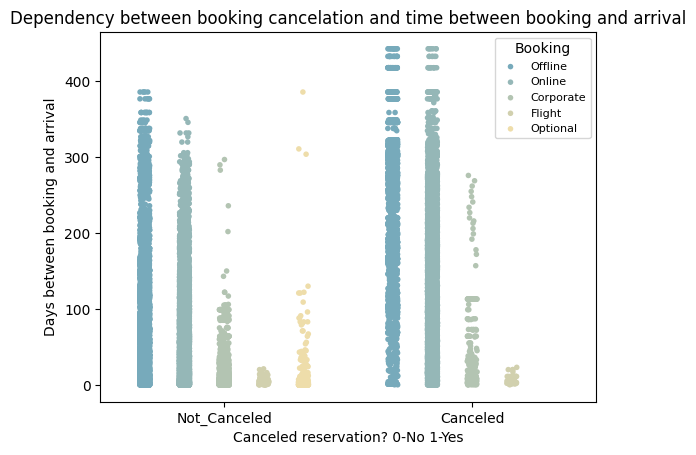

In [ ]:
stp = sns.stripplot(data=df, x="booking_status", y="lead_time", hue="market_segment_type", jitter = True, dodge = True, palette = 'blend:#7AB,#EDA', size = 4)
plt.gca().set_title('Dependency between booking cancelation and time between booking and arrival')
labels_dict = {0:'Offline', 1:'Online', 2:'Corporate', 3:'Flight', 4:'Optional'}
plt.legend(loc='upper right', title='Booking',labels=labels_dict.values(), prop={'size': 8})
stp.set_xlabel('Canceled reservation? 0-No 1-Yes')
stp.set_ylabel('Days between booking and arrival')

#Offline reservations are more reliable, in that they are less likely to be canceled at a distance than online reservations.
#Another surprising thing is that it doesn't really matter how many days elapse between the booking date and the arrival date. i.e. it has almost no effect on whether the reservation is canceled.
#Although it would seem that the more days before arrival, the more likely that the reservation will be canceled, since different things can happen in life (plans can change, etc.), but as we can see, it basically has no effect.

Text(37.722222222222214, 0.5, 'Average price per room')

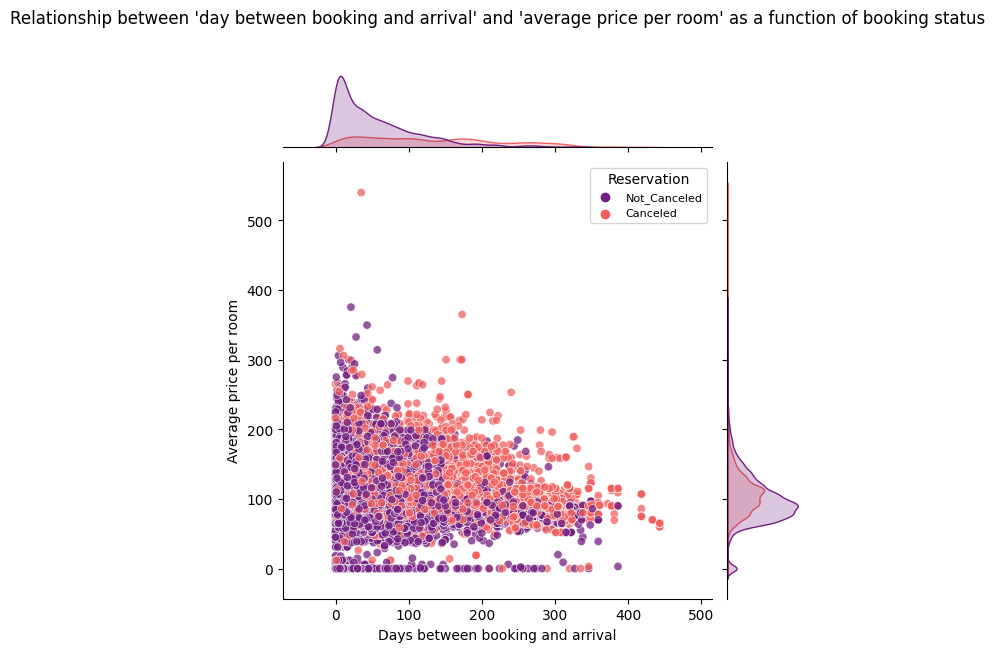

In [ ]:
jnt = sns.jointplot(data=df, x='lead_time', y='avg_price_per_room',
              hue='booking_status', alpha=0.75, palette = 'magma')
plt.gca().set_title('Relationship between \'day between booking and arrival\' and \'average price per room\' as a function of booking status', y=1.3)
plt.legend(loc='upper right', title='Reservation', prop={'size': 8})
jnt.ax_joint.set_xlabel('Days between booking and arrival')
jnt.ax_joint.set_ylabel('Average price per room')

#As mentioned above, around the 100 euro mark is where the most room bookings are made.
#At the same time, obviously more cancellations start around one hundred days and one hundred euros (0-no , yes-1).
#So we can say that there is a correlation between how expensive a room is and the days between booking and arrival.
#That is, the more expensive the room and the more days between booking and arrival, the more likely it is to be canceled.

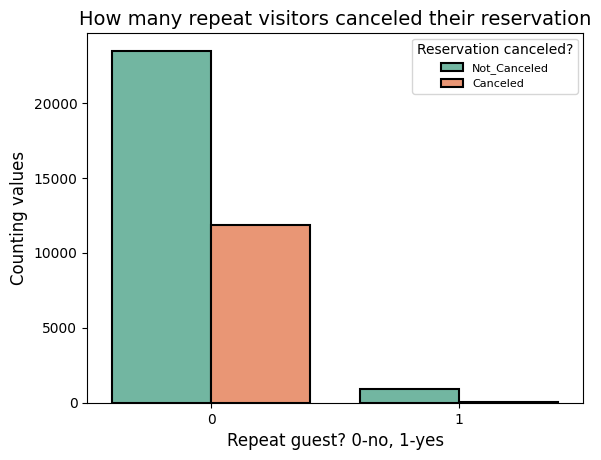

In [ ]:
ax = sns.countplot(x="repeated_guest", hue="booking_status", data=df, palette="Set2", edgecolor='black', linewidth=1.5)

ax.set_xlabel('Repeat guest? 0-no, 1-yes', fontsize=12)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('How many repeat visitors canceled their reservation', fontsize=14)
plt.legend(loc='upper right', title='Reservation canceled?', prop={'size': 8})
plt.show()

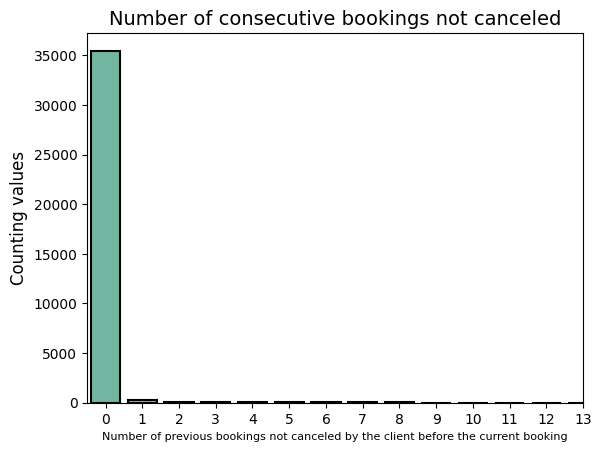

In [ ]:
ax = sns.countplot(x="no_of_previous_bookings_not_canceled", data=df, palette="Set2", edgecolor='black', linewidth=1.5)
ax.set_xlim(right=13)

ax.set_xlabel('Number of previous bookings not canceled by the client before the current booking', fontsize=8)
ax.set_ylabel('Counting values', fontsize=12)
ax.set_title('Number of consecutive bookings not canceled', fontsize=14)

plt.show()

#When visiting a hotel again, reservations are canceled much less often.
#Very few "successful" bookings are made in a row by a single customer, which can speak of their loyalty and trust in the brand.

In [ ]:
bookings_per_month = df.groupby('arrival_month')['Booking_ID'].count().reset_index()
fig = px.bar(bookings_per_month, x='arrival_month', y='Booking_ID')

fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

# **Data Preprocessing For Models.**

In [ ]:
# Datatype changing
cat=df.select_dtypes(exclude=[np.number])

for i in cat.columns:
    df[i]=df[i].astype('category')

# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

In [ ]:
# Data Label Encoding
for i in cat.columns:
    df[i+"_encoder"]=LabelEncoder().fit_transform(df[i])

# Taking numerical values
num=df.select_dtypes(include=[np.number])

#Selecting features & target variable
x=num.drop('booking_status_encoder',axis=1)
y=num['booking_status_encoder']

#Data Scaling
x=pd.DataFrame(RobustScaler().fit_transform(x.to_numpy()),columns=x.columns)

#Scaled data
x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0


In [ ]:
data=x.join(y)

# Final scaled Data
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Booking_ID_encoder,type_of_meal_plan_encoder,room_type_reserved_encoder,market_segment_type_encoder,booking_status_encoder
0,0.0,0.0,0.0,0.0,0.0,1.532110,-1.0,0.4,-0.933333,0.0,0.0,0.0,-0.867758,0.0,-1.000000,0.0,0.0,-1.0,1
1,0.0,0.0,0.5,0.5,0.0,-0.477064,0.0,0.6,-0.666667,0.0,0.0,0.0,0.182116,1.0,-0.999945,3.0,0.0,0.0,1
2,-1.0,0.0,0.5,-0.5,0.0,-0.513761,0.0,-1.2,0.800000,0.0,0.0,0.0,-0.993703,0.0,-0.999890,0.0,0.0,0.0,0
3,0.0,0.0,-0.5,0.0,0.0,1.412844,0.0,-0.6,0.266667,0.0,0.0,0.0,0.013854,0.0,-0.999835,0.0,0.0,0.0,0
4,0.0,0.0,0.0,-0.5,0.0,-0.082569,0.0,-0.8,-0.333333,0.0,0.0,0.0,-0.124685,0.0,-0.999779,3.0,0.0,0.0,0


In [ ]:
# Data Spliting into training & testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# **Model Building**

In [ ]:
# Logistic Regression
def mdl_lr(x_train,x_test,y_train,y_test):
    global acc_trn_lr,acc_lr,f1_lr

    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_lr=lr.score(x_train,y_train)
    acc_lr=accuracy_score(y_test,y_pred)
    f1_lr=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Logistic Regression**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_lr)
    print("Testing Accuracy : ",acc_lr)
    print("F1 Score : ",f1_lr)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

# Gaussian Naive Bayes
def mdl_nb(x_train,x_test,y_train,y_test):
    global acc_trn_nb,acc_nb,f1_nb

    lr=GaussianNB()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_nb=lr.score(x_train,y_train)
    acc_nb=accuracy_score(y_test,y_pred)
    f1_nb=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Gaussian Naive Bayes**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_nb)
    print("Testing Accuracy : ",acc_nb)
    print("F1 Score : ",f1_nb)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

    # Random Forest
def mdl_rf(x_train,x_test,y_train,y_test):
    global acc_trn_rf,acc_rf,f1_rf

    lr=RandomForestClassifier(random_state=10)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_rf=lr.score(x_train,y_train)
    acc_rf=accuracy_score(y_test,y_pred)
    f1_rf=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********Random Forest**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_rf)
    print("Testing Accuracy : ",acc_rf)
    print("F1 Score : ",f1_rf)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")

    # X Gradient Boosting
def mdl_xgb(x_train,x_test,y_train,y_test):
    global acc_trn_xgb,acc_xgb,f1_xgb

    lr=XGBClassifier(random_state=10)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)

    acc_trn_xgb=lr.score(x_train,y_train)
    acc_xgb=accuracy_score(y_test,y_pred)
    f1_xgb=f1_score(y_test,y_pred)
    conf=confusion_matrix(y_test,y_pred)
    clf=classification_report(y_test,y_pred)

    print("***********X Gradient Boosting**************")
    print("\n")
    print("Training Accuracy : ",acc_trn_xgb)
    print("Testing Accuracy : ",acc_xgb)
    print("F1 Score : ",f1_xgb)
    print("\n")
    print("Confusion Matrix :\n",conf)
    print("Classification Report :\n",clf)
    print("\n")
    print(30*"=======")


In [ ]:
# Model Evaluation
mdl_lr(x_train,x_test,y_train,y_test)
mdl_nb(x_train,x_test,y_train,y_test)
mdl_rf(x_train,x_test,y_train,y_test)
mdl_xgb(x_train,x_test,y_train,y_test)

***********Logistic Regression**************


Training Accuracy :  0.805765595463138
Testing Accuracy :  0.8074979325553616
F1 Score :  0.8625959205089525


Confusion Matrix :
 [[2212 1395]
 [ 700 6576]]
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.61      0.68      3607
           1       0.82      0.90      0.86      7276

    accuracy                           0.81     10883
   macro avg       0.79      0.76      0.77     10883
weighted avg       0.80      0.81      0.80     10883



***********Gaussian Naive Bayes**************


Training Accuracy :  0.44068998109640833
Testing Accuracy :  0.4427088119084811
F1 Score :  0.3000577034045009


Confusion Matrix :
 [[3518   89]
 [5976 1300]]
Classification Report :
               precision    recall  f1-score   support

           0       0.37      0.98      0.54      3607
           1       0.94      0.18      0.30      7276

    accuracy                           0.44 

# **Model Evaluation**

In [ ]:
# Model Evaluation Tabular Format
tbl=pd.DataFrame()
tbl['Model']=['Logistic Regression','Naive Bayes','Random Forest','X Gradient Boosting']
tbl['Training Accuracy']=[acc_trn_lr,acc_trn_nb,acc_trn_rf,acc_trn_xgb]
tbl['Testing Accuracy']=[acc_lr,acc_nb,acc_rf,acc_xgb]
tbl['F1 Score']=[f1_lr,f1_nb,f1_rf,f1_xgb]

tbl.sort_values('F1 Score',ascending=False,ignore_index=True)

,Model,Training Accuracy,Testing Accuracy,F1 Score
0,Random Forest,1.000000,0.899936,0.926810
1,X Gradient Boosting,0.924189,0.888082,0.918057
2,Logistic Regression,0.805766,0.807498,0.862596
3,Naive Bayes,0.440690,0.442709,0.300058


**Conclusion:** From the sorted table, it can be concluded which model performed the best in terms of the F1 score. The model with the highest F1 score is considered the most effective in achieving a balance between precision and recall. This allows us to make an informed decision about choosing the Random Forest model for specific classification problems.


## **THANKYOU!!!**